# Importing Required Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [47]:
ds = pd.read_csv("student.csv")
ds.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [48]:
ds.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [49]:
ds.drop(columns = "student_id",inplace = True)

In [50]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       909 non-null    object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

In [51]:
ds.shape

(1000, 15)

# Identifying Null Values

In [52]:
ds.isnull().sum()

age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

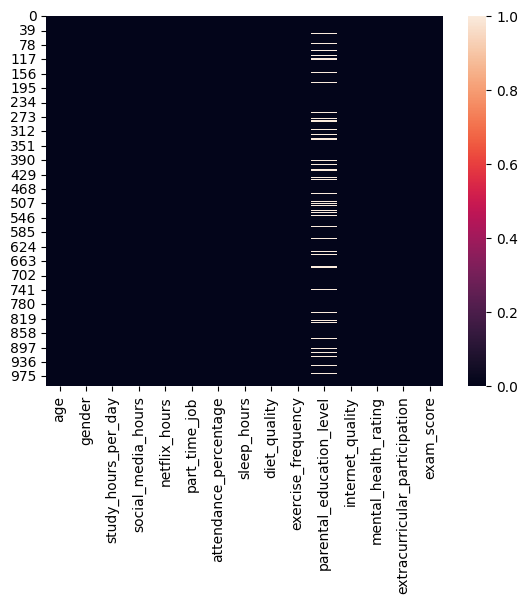

In [53]:
sns.heatmap(ds.isnull())
plt.show()

# Filling Null Values

In [54]:
for i in ds.select_dtypes(include = "object").columns:
    ds[i].fillna(ds[i].mode()[0],inplace = True)
ds.isnull().sum()

age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

# Plots for categorical Data

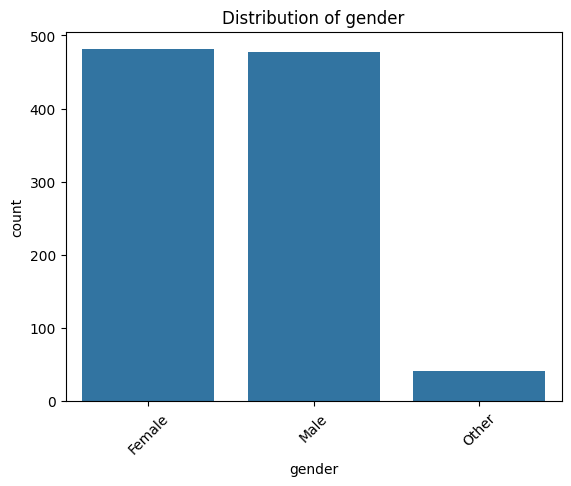

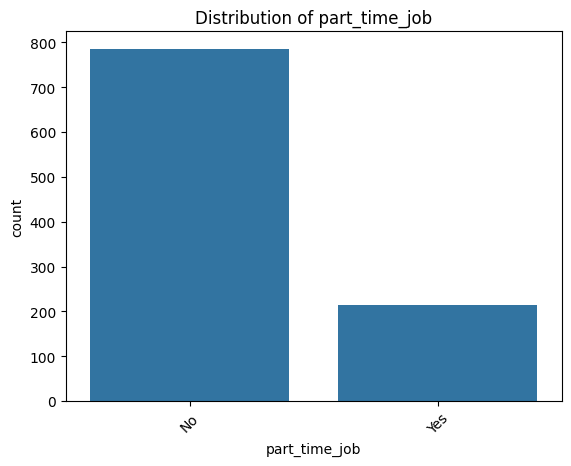

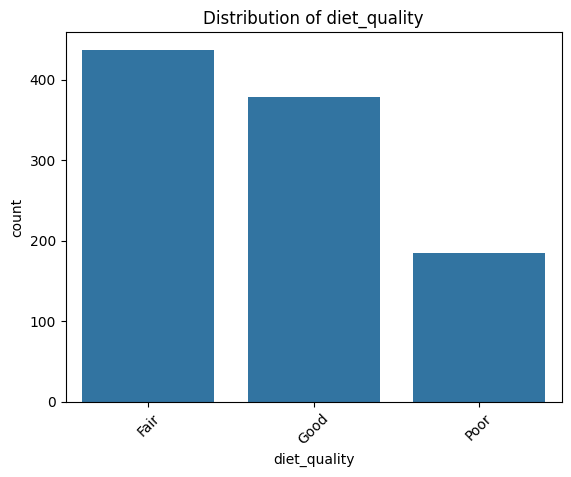

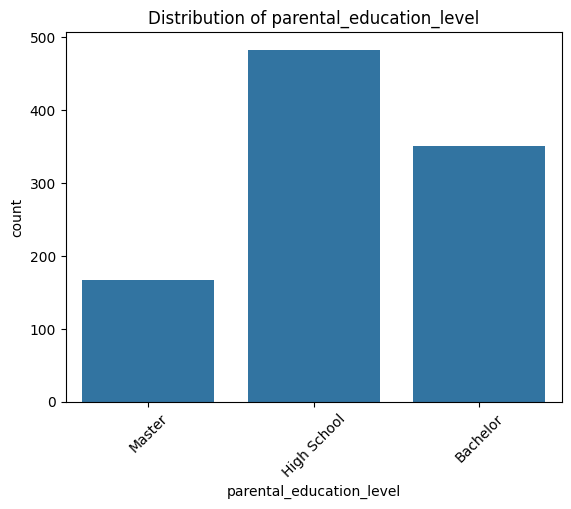

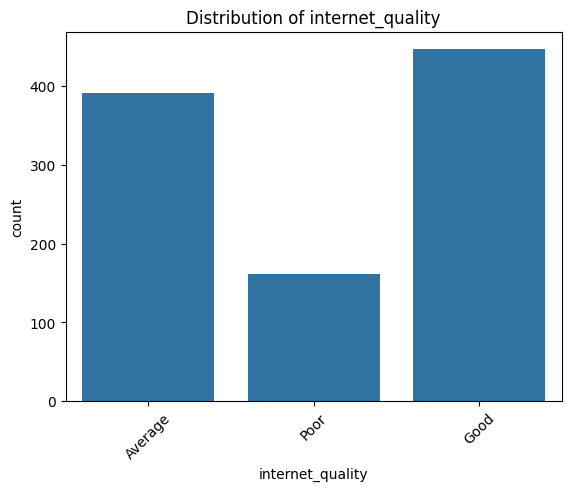

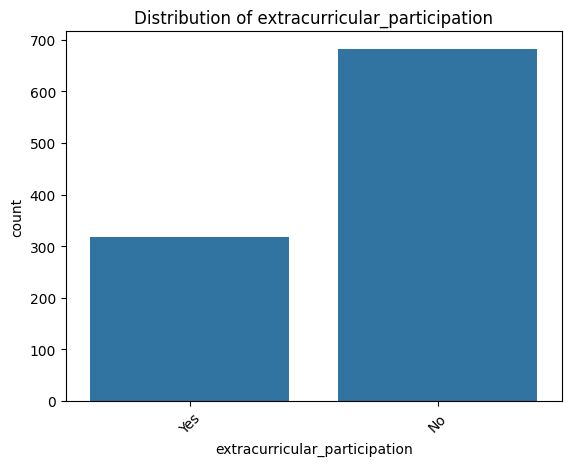

In [55]:
for cols in ds.select_dtypes(include = "object").columns:
    sns.countplot(data = ds,x = cols)
    plt.title(f"Distribution of {cols}")
    plt.xticks(rotation = 45)
    plt.show()

# Plots for Numerical Data

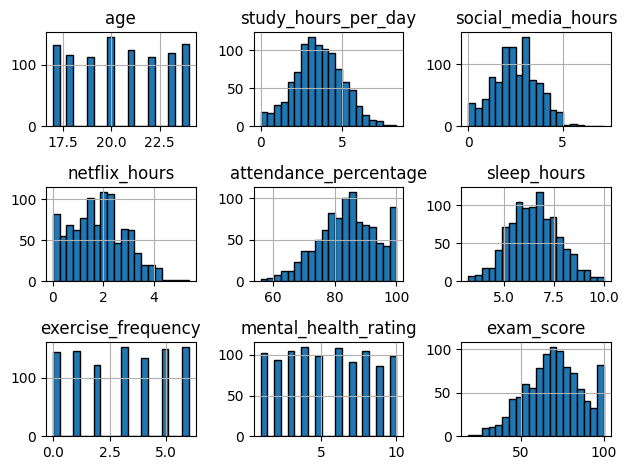

In [56]:
ds.hist(bins = 20,edgecolor = 'black')
plt.tight_layout()
plt.show()

# Encoding Categorical Features #

**One Hot Encoding on gender, part_time_job & extracurricular_participation**

In [57]:
en_data = ds[["part_time_job","extracurricular_participation"]]
en_data

,part_time_job,extracurricular_participation
0,No,Yes
1,No,No
2,No,No
3,No,Yes
4,No,No
...,...,...
995,No,Yes
996,Yes,Yes
997,No,Yes
998,Yes,No


In [58]:
pd.get_dummies(en_data)

,part_time_job_No,part_time_job_Yes,extracurricular_participation_No,extracurricular_participation_Yes
0,True,False,False,True
1,True,False,True,False
2,True,False,True,False
3,True,False,False,True
4,True,False,True,False
...,...,...,...,...
995,True,False,False,True
996,False,True,False,True
997,True,False,False,True
998,False,True,True,False


In [59]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = "first")

In [60]:
arr_nom_bin = ohe.fit_transform(ds[["part_time_job","extracurricular_participation"]]).toarray()

In [61]:
df_nom_bin = pd.DataFrame(arr_nom_bin,columns=["part_time_job_Yes","extracurricular_participation_Yes"])

In [62]:
ds.rename(columns = {"part_time_job":"part_time_job_Yes","extracurricular_participation":"extracurricular_participation_Yes"},inplace = True)

In [63]:
ds[["part_time_job_Yes","extracurricular_participation_Yes"]] = df_nom_bin
ds

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job_Yes,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation_Yes,exam_score
0,23,Female,0.0,1.2,1.1,0.0,85.0,8.0,Fair,6,Master,Average,8,1.0,56.2
1,20,Female,6.9,2.8,2.3,0.0,97.3,4.6,Good,6,High School,Average,8,0.0,100.0
2,21,Male,1.4,3.1,1.3,0.0,94.8,8.0,Poor,1,High School,Poor,1,0.0,34.3
3,23,Female,1.0,3.9,1.0,0.0,71.0,9.2,Poor,4,Master,Good,1,1.0,26.8
4,19,Female,5.0,4.4,0.5,0.0,90.9,4.9,Fair,3,Master,Good,1,0.0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,2.6,0.5,1.6,0.0,77.0,7.5,Fair,2,High School,Good,6,1.0,76.1
996,17,Female,2.9,1.0,2.4,1.0,86.0,6.8,Poor,1,High School,Average,6,1.0,65.9
997,20,Male,3.0,2.6,1.3,0.0,61.9,6.5,Good,5,Bachelor,Good,9,1.0,64.4
998,24,Male,5.4,4.1,1.1,1.0,100.0,7.6,Fair,0,Bachelor,Average,1,0.0,69.7


**Label Encoding on gender**

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [65]:
le.fit(ds["gender"])

LabelEncoder()

In [66]:
arr_nom = le.transform(ds["gender"])

In [67]:
df_nom = pd.DataFrame(arr_nom,columns=["gender_labelled"])
df_nom

,gender_labelled
0,0
1,0
2,1
3,0
4,0
...,...
995,0
996,0
997,1
998,1


In [68]:
ds["gender_labelled"] = df_nom
ds

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job_Yes,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation_Yes,exam_score,gender_labelled
0,23,Female,0.0,1.2,1.1,0.0,85.0,8.0,Fair,6,Master,Average,8,1.0,56.2,0
1,20,Female,6.9,2.8,2.3,0.0,97.3,4.6,Good,6,High School,Average,8,0.0,100.0,0
2,21,Male,1.4,3.1,1.3,0.0,94.8,8.0,Poor,1,High School,Poor,1,0.0,34.3,1
3,23,Female,1.0,3.9,1.0,0.0,71.0,9.2,Poor,4,Master,Good,1,1.0,26.8,0
4,19,Female,5.0,4.4,0.5,0.0,90.9,4.9,Fair,3,Master,Good,1,0.0,66.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,2.6,0.5,1.6,0.0,77.0,7.5,Fair,2,High School,Good,6,1.0,76.1,0
996,17,Female,2.9,1.0,2.4,1.0,86.0,6.8,Poor,1,High School,Average,6,1.0,65.9,0
997,20,Male,3.0,2.6,1.3,0.0,61.9,6.5,Good,5,Bachelor,Good,9,1.0,64.4,1
998,24,Male,5.4,4.1,1.1,1.0,100.0,7.6,Fair,0,Bachelor,Average,1,0.0,69.7,1


In [69]:
ds.drop(columns = "gender",inplace = True)

**Ordinal Encoding on diet_quality, parental_education_level & internet_quality**

In [70]:
ds["diet_quality"].unique()

array(['Fair', 'Good', 'Poor'], dtype=object)

In [71]:
ds["parental_education_level"].unique()

array(['Master', 'High School', 'Bachelor'], dtype=object)

In [72]:
ds["internet_quality"].unique()

array(['Average', 'Poor', 'Good'], dtype=object)

In [73]:
enc_Diet = {'Fair' : 2,'Good' : 3,'Poor':1}
enc_Parent = {'Master' : 3, 'High School' : 1, 'Bachelor' : 2}
enc_Internet = {'Average' : 2,'Poor' : 1,'Good' : 3}

In [74]:
ds["diet_quality"] = ds["diet_quality"].map(enc_Diet)
ds["parental_education_level"] = ds["parental_education_level"].map(enc_Parent)
ds["internet_quality"] = ds["internet_quality"].map(enc_Internet)
ds

,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job_Yes,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation_Yes,exam_score,gender_labelled
0,23,0.0,1.2,1.1,0.0,85.0,8.0,2,6,3,2,8,1.0,56.2,0
1,20,6.9,2.8,2.3,0.0,97.3,4.6,3,6,1,2,8,0.0,100.0,0
2,21,1.4,3.1,1.3,0.0,94.8,8.0,1,1,1,1,1,0.0,34.3,1
3,23,1.0,3.9,1.0,0.0,71.0,9.2,1,4,3,3,1,1.0,26.8,0
4,19,5.0,4.4,0.5,0.0,90.9,4.9,2,3,3,3,1,0.0,66.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,2.6,0.5,1.6,0.0,77.0,7.5,2,2,1,3,6,1.0,76.1,0
996,17,2.9,1.0,2.4,1.0,86.0,6.8,1,1,1,2,6,1.0,65.9,0
997,20,3.0,2.6,1.3,0.0,61.9,6.5,3,5,2,3,9,1.0,64.4,1
998,24,5.4,4.1,1.1,1.0,100.0,7.6,2,0,2,2,1,0.0,69.7,1


# Correlation Heatmap

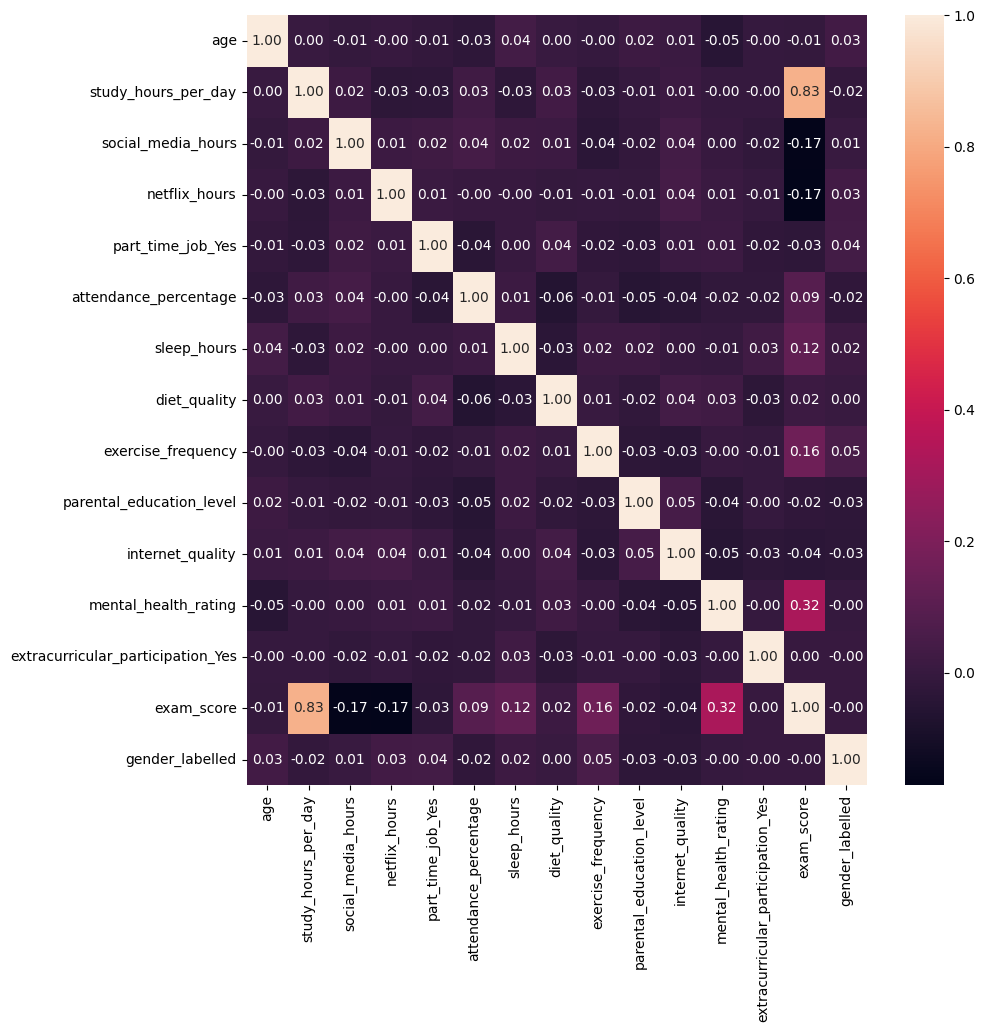

In [75]:
plt.figure(figsize = (10,10))
sns.heatmap(ds.corr(),annot = True,fmt = ".2f")
plt.show()

# Handling Outliers #

In [76]:
ds.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job_Yes,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation_Yes,exam_score,gender_labelled
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,0.215000,84.131700,6.470100,2.19300,3.042000,1.684000,2.285000,5.438000,0.318000,69.601500,0.561000
std,2.3081,1.46889,1.172422,1.075118,0.411028,9.399246,1.226377,0.72545,2.025423,0.742088,0.726845,2.847501,0.465932,16.888564,0.574987
min,17.0000,0.00000,0.000000,0.000000,0.000000,56.000000,3.200000,1.00000,0.000000,1.000000,1.000000,1.000000,0.000000,18.400000,0.000000
25%,18.7500,2.60000,1.700000,1.000000,0.000000,78.000000,5.600000,2.00000,1.000000,1.000000,2.000000,3.000000,0.000000,58.475000,0.000000
50%,20.0000,3.50000,2.500000,1.800000,0.000000,84.400000,6.500000,2.00000,3.000000,2.000000,2.000000,5.000000,0.000000,70.500000,1.000000
75%,23.0000,4.50000,3.300000,2.525000,0.000000,91.025000,7.300000,3.00000,5.000000,2.000000,3.000000,8.000000,1.000000,81.325000,1.000000
max,24.0000,8.30000,7.200000,5.400000,1.000000,100.000000,10.000000,3.00000,6.000000,3.000000,3.000000,10.000000,1.000000,100.000000,2.000000


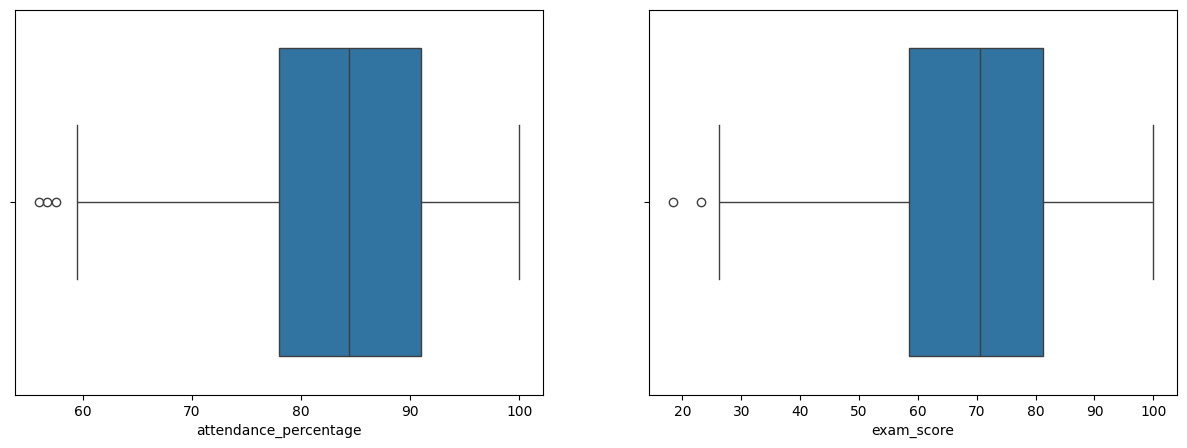

In [77]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(x = "attendance_percentage",data = ds)

plt.subplot(1,2,2)
sns.boxplot(x = "exam_score",data = ds)

plt.show()

**No outliers present**

# Model Selection #

In [78]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor

In [79]:
features = ["study_hours_per_day","social_media_hours","netflix_hours","part_time_job_Yes","attendance_percentage","sleep_hours","diet_quality","exercise_frequency","mental_health_rating","extracurricular_participation_Yes"]

In [80]:
target = ["exam_score"]

In [81]:
ds_model = ds[features + target].copy()
ds_model.head()

,study_hours_per_day,social_media_hours,netflix_hours,part_time_job_Yes,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,mental_health_rating,extracurricular_participation_Yes,exam_score
0,0.0,1.2,1.1,0.0,85.0,8.0,2,6,8,1.0,56.2
1,6.9,2.8,2.3,0.0,97.3,4.6,3,6,8,0.0,100.0
2,1.4,3.1,1.3,0.0,94.8,8.0,1,1,1,0.0,34.3
3,1.0,3.9,1.0,0.0,71.0,9.2,1,4,1,1.0,26.8
4,5.0,4.4,0.5,0.0,90.9,4.9,2,3,1,0.0,66.4


In [82]:
x = ds_model[features]
y = ds_model[target]

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [84]:
models = {
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {}
    },
    "DecisionTree" : {
        "model": DecisionTreeRegressor (),
        "params": {"max_depth": [3,5,10], "min_samples_split": [2,51]}
    },
    "RandomForest":{
        "model": RandomForestRegressor(),
        "params": {"n_estimators": [50,100], "max_depth": [5,10]}
    }
}

In [85]:
best_models = []

In [86]:
for name, config in models.items():
    print(f"Training {name}")
    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring="neg_mean_squared_error")
    grid.fit(x_train,y_train)
    y_pred = grid.predict(x_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    best_models.append({
        "model": name,
        "best_params": grid.best_params_,
        "rmse": rmse,
        "r2": r2
    })

Training LinearRegression
Training DecisionTree
Training RandomForest


In [87]:
results_df = pd.DataFrame(best_models)
results_df

,model,best_params,rmse,r2
0,LinearRegression,{},5.085738,0.899135
1,DecisionTree,"{'max_depth': 5, 'min_samples_split': 2}",8.894063,0.691516
2,RandomForest,"{'max_depth': 10, 'n_estimators': 100}",6.120249,0.853927


# Choosing Linear Regression #

In [88]:
lr = LinearRegression();
lr.fit(x_train,y_train)

LinearRegression()

In [96]:
lr.score(x_test,y_test)

0.8991349785588596

In [95]:
lr.score(x_train,y_train)

0.9012173270056021

In [89]:
import joblib
joblib.dump(lr,"model1.pkl")

['model1.pkl']

In [90]:
joblib.load("model1.pkl").predict(x_test)

array([[ 65.95478419],
       [ 74.70777838],
       [ 78.56907062],
       [ 73.73483621],
       [ 61.31010069],
       [ 54.88341126],
       [ 75.43812601],
       [ 55.42083699],
       [ 41.15675107],
       [ 72.69761841],
       [ 41.00082864],
       [102.77818454],
       [ 57.69693145],
       [ 72.31041721],
       [ 35.54514971],
       [ 58.59297094],
       [ 72.94736737],
       [ 68.78506911],
       [ 65.5536248 ],
       [ 50.19021638],
       [ 55.12983896],
       [ 62.46718563],
       [ 50.3058814 ],
       [ 87.90082352],
       [ 70.99385593],
       [ 71.46580317],
       [ 68.46001695],
       [ 57.56753954],
       [ 69.73788966],
       [ 67.98464761],
       [ 66.02013797],
       [ 79.0534968 ],
       [ 64.61685445],
       [ 82.08631022],
       [ 60.48039287],
       [ 50.85718274],
       [ 71.80037871],
       [ 58.29578905],
       [ 64.78347914],
       [ 97.83590189],
       [ 50.57073556],
       [ 85.77474789],
       [ 67.67785596],
       [ 63